# Qiskit Workshop Assignment
## PC5228 Quantum Information and Computation

Course Instructor: Prof. Dagomir Kaszlikowski

Workshop Instructor: Junye Huang

# Instructions : 


Qiskit assignment questions are different from the other tutorial or assignment questions encountered during the course PC5228. This assignment has 2 problems. In problem #1, we will learn how to implement the teleportation protocol learnt in the class on a quantum simulator and a real quantum computer.  In problem #2, we implement Mach-Zehnder interferometer in quantum circuits and run on a real quantum computer. In both the problems, partial solutions are provided and students are expected to complete the solutions as part of assignment. Students must not modify anything other than the places where you see: "<font color='orange'>Please insert code in the cell below</font>"

You must complete your code and submit the entire jupyter notebook to LumiNUS. The assignment will be due by 11:59 pm, Nov 30, 2020. 

## Problems

1. [Quantum Teleportation Question](#qtel) 
2. [Mach-Zehnder Interferometer Question](#mzi)

# Resources : 

- Coding with Qiskit Series on Qiskit YouTube channel: https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY

- Qiskit textbook: https://qiskit.org/textbook/preface.html

- Instructions to install Qiskit on local machine: https://qiskit.org/documentation/install.html 

- IBM Quantum Experience to use Qiskit on the cloud : https://quantum-computing.ibm.com/ 
 
- Qiskit Slack to post any doubts regarding the assignment or qiskit in general. You can join Qiskit Slack workspace using this [invitation link](https://ibm.co/joinqiskitslack). Once you joined, please direct message (@Junye Huang). Junye will add you to the private slack channel created for the PC5228 course. 
 


# Accessing Notebook via IBM Quantum Experience : 


1) Open IBM Quantum Experience using the link : https://quantum-computing.ibm.com/ .

2) Sign in to IBM Quantum Experience using email-id and password registered.

3) Click on sidebar Menu --> Quantum Lab.

4) Click on Import and Select downloaded this Jupyter notebook file. 

5) Complete the assignment and save the file as StudentID.ipynb.

6) Upload the saved file to LumiNUS.







# Problem #1: Quantum Teleportation  - 10 points <a id='qtel'></a>




## Contents

1. [Overview](#qt-intro) 
2. [Preparing a GHZ state and obtain its measurement statistics](#how1)  
    2.1 [Run on statevector simulator](#testing1)   
    2.2 [Run on QASM simulator](#testing2)  
3. [The Quantum Teleportation Protocol](#how)       
    3.1 [Simulating the Teleportation Protocol using the QASM Simulator](#simulating)      
    3.2 [Teleportation on a Real Quantum Computer](#real_qc)    
      
4. [References](#references)



## 1. Introduction <a id='qt-intro'></a>


In the teleportation protocol, Alice sends a single qubit state to Bob using Bell pair which is shared between Alice and Bob. In this assignment, we will show that the teleportation protocol also preserves entanglement. That is, suppose Alice and Charlie share a pure state $\vert\psi\rangle_{CA_1} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$ which is entangled. Charlie holds the first 2 qubits and Alice holds the 3rd qubit of $\vert\psi\rangle_{CA_1}$. Alice also shares the Bell state  $\vert\phi\rangle_{A_2B} = \frac{1}{\sqrt{2}}\vert00\rangle + \frac{1}{\sqrt{2}}\vert11\rangle$  with Bob, where
Alice holds $A_2$, Bob holds $B$. Now Alice and Bob perform the teleportation protocol to send the
state in Alice's register $A_1$ to Bob, using their shared Bell state in $\vert\phi\rangle_{A_2B}$. Then we Show that after the teleportation protocol, Charlie and Bob share the state $\vert\psi\rangle_{CB} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$. We first use Qiskit's built-in simulators to test our quantum circuit, and then try it out on a real quantum computer.








In [1]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pylab

# parameters for plotting nice figures
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## 2. Preparing a GHZ state and obtain its measurement statistics <a id='how1'></a>
We create GHZ state $\vert\psi\rangle_{CA_1} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$ in qubits q_0, q_1, q_2 in this step. Let us say q_0, q_1 are with Charlie and q_2 is with Alice. We intend to perform quantum teleportation protocol and send qubit q_2 from Alice to Bob.

## <font color='orange'>Please insert code in the cell below (3 points) </font>

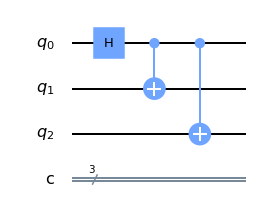

In [13]:
from qiskit import QuantumCircuit

qc_ghz = QuantumCircuit(3,3)

############################################
# Please insert your code below (3 points) #
############################################

#
#
#
#
#

############
# Solution #
############

qc_ghz.h(0)    
qc_ghz.cx(0,1)
qc_ghz.cx(0,2)

############################################

qc_ghz.draw(output='mpl') # visualize the circuit using matplotlib output

### 2.1 Run on statevector simulator <a id='testing1'></a>
We created GHZ state in qubits q_0, q_1, q_2. Now, we simulate the quantum circuit using 'statevector_simulator' and see the density matrix of the output state

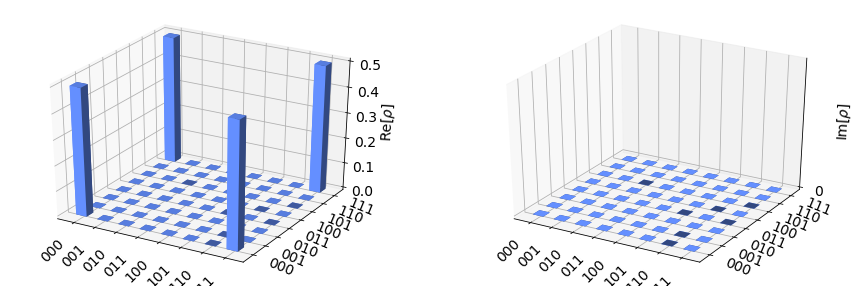

In [8]:
from qiskit import execute
from qiskit.providers.aer import StatevectorSimulator
from qiskit.visualization import plot_state_city

job_sv = execute(qc_ghz, StatevectorSimulator())
result_sv = job_sv.result()
statevector = result_sv.get_statevector()
plot_state_city(statevector)

### 2.2 Run on QASM simulator <a id='testing2'></a>
Now, we simulate the quantum circuit using 'QASM  simulator'. 

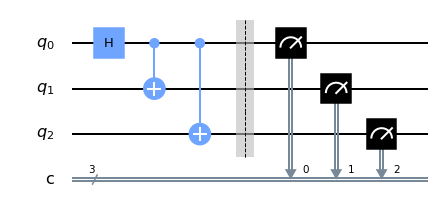

In [4]:
# In order to run on QASM simulator, you first need to measure the qubits
qc_ghz.barrier() # draw a barrier for clarity
qc_ghz.measure([0,1,2],[0,1,2])  # command to measure qubits q_0,q_1,q_2 and 
                                    # store the results in registers c_0, c_1, c_2.
qc_ghz.draw(output='mpl') # visualize the circuit using matplotlib output

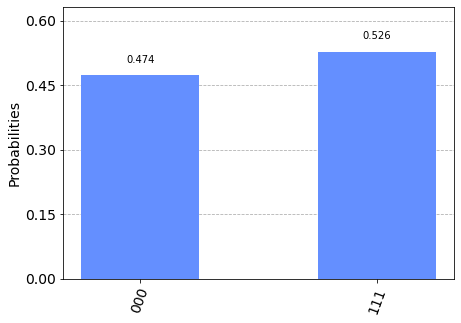

In [5]:
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
      
job = execute(qc_ghz, QasmSimulator(), shots=1000) # execute the circuit using QASM simulator
result = job.result() # retrieve the result from simulation
counts = result.get_counts() # get measurement counts from result
plot_histogram(counts) # plot counts as histogram

At this point, you should see the histogram plot with 000 - close to 0.5 and 111- close to 0.5. 

## 3. The Quantum Teleportation Protocol <a id='how'></a>

We prepare a pure state $\vert\psi\rangle_{CA_1} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$. Charlie holds the first 2 qubits and Alice holds the 3rd qubit of $\vert\psi\rangle_{CA_1}$. We also prepare the Bell state  $\vert\phi\rangle_{A_2B} = \frac{1}{\sqrt{2}}\vert00\rangle + \frac{1}{\sqrt{2}}\vert11\rangle$, where
Alice holds $A_2$, Bob holds $B$. Now Alice and Bob perform the teleportation protocol to send the
state in Alice's register $A_1$ to Bob, using their shared Bell state in $\vert\phi\rangle_{A_2B}$. Then we Show that after the teleportation protocol, Charlie and Bob share the state $\vert\psi\rangle_{CB} = \frac{1}{\sqrt{2}}\vert000\rangle + \frac{1}{\sqrt{2}}\vert111\rangle$. We first use Qiskit's built-in simulators to test our quantum circuit, and then try it out on a real quantum computer.




In [39]:
# Create a quantum circuit for teleportation
qc_teleport = QuantumCircuit(5, 3)

### Step 1
We use the below function to create GHZ state 


## <font color='orange'>Please insert code in the cell below (3 points)</font>

In [40]:
def create_ghz(qc, a, b, c): 
    """Create quantum circuit to prepare ghz state."""
    
    ############################################
    # Please insert your code below (3 points) #
    ############################################
    
    #
    # 
    #
    #
    #    
    
    ############
    # Solution #
    ############
    
    qc.h(a)               
    qc.cx(a,b)
    qc.cx(a,c) 

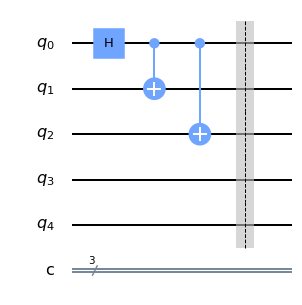

In [41]:
# Initialize state in qubits 0,1,2 to GHZ state.
# Qubits q_0, q_1 are with charlie and q_2 is with Alice
# Alice send qubit q_2 to Bob using Teleportation.

create_ghz(qc_teleport, 0, 1, 2)
qc_teleport.barrier()
qc_teleport.draw(output='mpl')

### Step 2
We create an entangled pair of qubits (Bell pair) and gives one to Bob and one to Alice. In quantum circuit language, the way to create a Bell pair between two qubits is to first transfer one of them to the X-basis ($|+\rangle$ and $|-\rangle$) using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the X-basis. 

In [42]:
def create_bell(qc, a, b):  
    """create quantum circuit to prepare bell state to be used in teleportation protocol."""
    
    qc.h(a) # applies hadamard on qubit specified by a
    qc.cx(a,b) # applies cnot on qubit specified by b with control on qubit specified by a

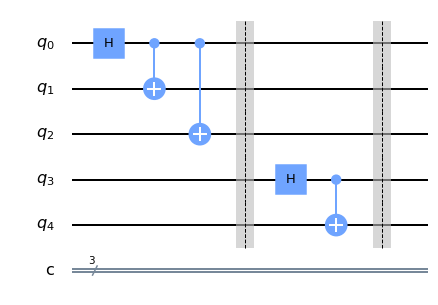

In [43]:
# Now let us begin the teleportation protocol
create_bell(qc_teleport,3,4)  # creates bell pair that is used in teleportation protocol between Alice and Bob.
                              # q3 is with Alice and q4 is with Bob.
qc_teleport.barrier()
qc_teleport.draw(output='mpl')

### Step 3

Alice operations in teleportation

In [44]:
def alice_gates(qc, c, d): 
    """apply Alice gates in teleportation protocol"""
    
    qc.cx(c, d) # applies cnot on qubit specified by d with control on qubit specified by c
    qc.h(c) # applies hadamard on qubit specified by c

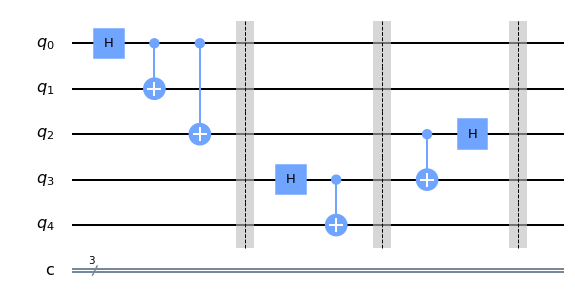

In [45]:
alice_gates(qc_teleport,2,3)  # invoke function to apply Alice gates in teleportation protocol 
                              # to qubits 2,3 (q2, q3)
qc_teleport.barrier()
qc_teleport.draw(output='mpl')

### Step 4

Alice measures her qubits in computational basis and sends the classical outcomes to Bob

In [46]:
def measure_and_send(qc, c, d):  
    """Measures qubits a & b and 'sends' the results to Bob"""
    
    qc.measure(c,0)
    qc.measure(d,1)

Ideally according to teleportation protocol, we should be measuring the Alice registers and send the outcomes to Bob. But since the IBM quantum computers currently do not support instructions after measurements, meaning we cannot run the quantum teleportation in its current form on real hardware. Fortunately, this does not limit our ability to perform any computations due to the _deferred measurement principle_ [1]. The principle states that any measurement can be postponed until the end of the circuit, i.e. we can move all the measurements to the end, and we should see the same results.

In [47]:
# This part is comment out because it IBM Quantum systems currently do not support instructions after measurements

# measure_and_send(qc_teleport,2,3)   # invoke function to apply Alice gates in teleportation protocol 
                                        # to qubits 2,3 (q2, q3)
# qc_teleport.barrier()
# qc_teleport.draw('mpl')

We will defer measuring in step (4) and instead apply Bob's operation conditioned on alices register instead. 

**Step 5**: Bob, who already has the qubit $q_4$, then applies the following gates depending on the state of the Alice register:

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate


In [48]:
# We use the below function to apply Bob gates in teleportation protocol after receiving classical bits from Alice.
def bob_gates(qc, a, b, c): # function to apply Bob gates in teleportation protocol.
    qc.cx(b, c)            # applies cX on qubit specified by c with control on qubit specified by b
    qc.cz(a, c)            # applies cZ on qubit specified by c with control on qubit specified by a

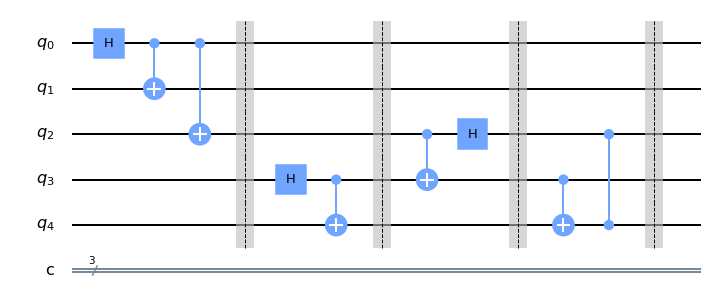

In [49]:
# Let's apply this to our circuit:
bob_gates(qc_teleport, 2, 3, 4)
qc_teleport.barrier() # Use barrier to separate steps
qc_teleport.draw(output='mpl')

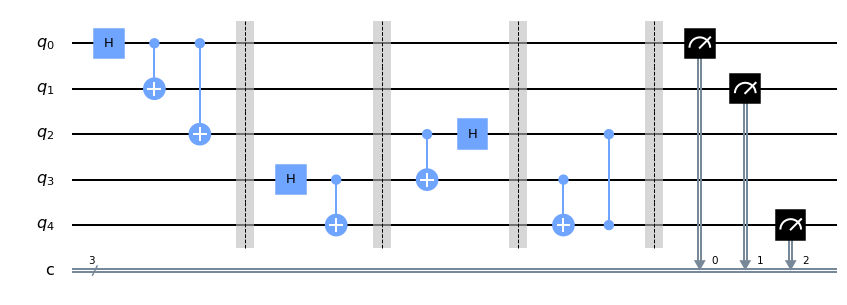

In [50]:
# See the results, we only care about the state of qubit 0,1 (Charlie registers) 
# and qubit 4 (q_2 is teleported to q_4) 

qc_teleport.measure([0,1,4],[0,1,2])
qc_teleport.draw(output='mpl')

And voila! At the end of this protocol, Alice's qubit has now teleported to Bob.

## 3.1 Simulating the Teleportation Protocol using the QASM Simulator <a id='simulating'></a>

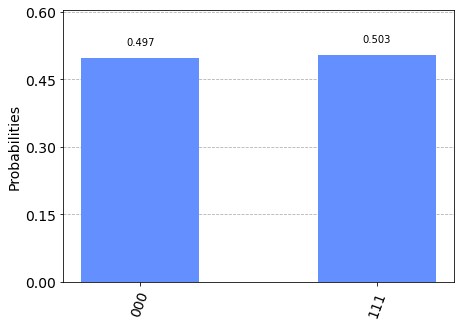

In [59]:
result_sim = execute(qc_teleport, QasmSimulator(), shots=1000).result()
counts_sim = result.get_counts()
plot_histogram(counts_sim)

## 3.2 Teleportation on a Real Quantum Computer <a id='real_qc'></a>

### IBM hardware and Deferred Measurement <a id='deferred-measurement'></a>

The IBM quantum computers currently do not support instructions after measurements, meaning we cannot run the quantum teleportation in its current form on real hardware. Fortunately, this does not limit our ability to perform any computations due to the _deferred measurement principle_ [1]. The principle states that any measurement can be postponed until the end of the circuit, i.e. we can move all the measurements to the end, and we should see the same results.


In this example, the early measurement in quantum teleportation would have allowed us to transmit a qubit state without a direct quantum communication channel. While moving the gates allows us to demonstrate the "teleportation" circuit on real hardware, it should be noted that the benefit of the teleportation process (transferring quantum states via classical channels) is lost.


In [53]:
# First, see what devices we are allowed to use by loading our saved accounts
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

/Users/junye/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [54]:
import qiskit.tools.jupyter # import handy jupyter tools for viewing backend details and monitoring job status
%qiskit_job_watcher # You should see a floating tab "IBMQ Jobs" appear on the top left corner

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [55]:
# get the least-busy backend at IQX
from qiskit.providers.ibmq import least_busy
device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                   not b.configuration().simulator and b.status().operational==True))
device

<IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>

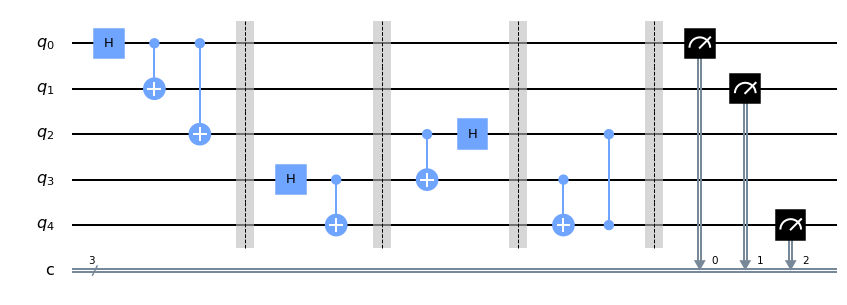

In [56]:
# Double check the circuit before submitting to IQX
qc_teleport.draw(output='mpl')

## <font color='orange'>Please insert code in the cell below (2 points)</font>

In [57]:
# Submit a job to IQX to run the circuit on a real device

############################################
# Please insert your code below (2 points) #
############################################

#
#
#
#
#

############
# Solution #
############

job_exp = execute(qc_teleport, device, shots=1000)

## <font color='orange'>Please insert code in the cell below (2 points)</font>

In [61]:
# Wait (typically <10 min) until the job is done on IQX before running this cell
# Extract counts from experimental results and store in variable `counts_exp`

############################################
# Please insert your code below (2 points) #
############################################

#
#
#
#
#

############
# Solution #
############

result_exp = job_exp.result()
counts_exp = result_exp.get_counts()

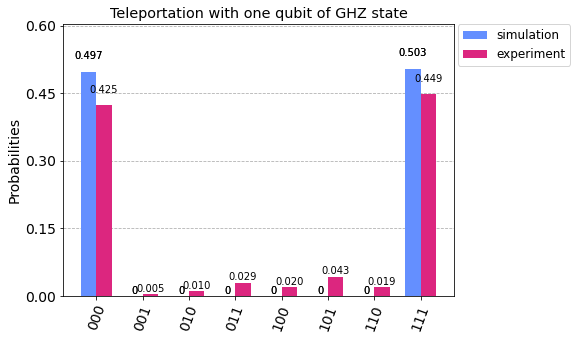

In [65]:
figure = plot_histogram([counts_sim, counts_exp], 
                        title='Teleportation with one qubit of GHZ state', 
                        legend=['simulation', 'experiment'])

# save figure to your disk
figure.savefig(fname='Teleportation with one qubit of GHZ state.pdf', bbox_inches="tight")

# show figure
figure

Notice that the measurement statistics of qubits 0,1,4 (q_2 is teleported to q_4) are the same as measurement statistics of GHZ state.

## 6. References <a id='references'></a>
[1] M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000).

[2] Qiskit textbook chapter on quantum teleporation: https://qiskit.org/textbook/ch-algorithms/teleportation.html

# Mach-Zehnder Interferometer Question - 10 points <a id='mzi'></a>


## Contents

1. [Introduction](#introduction)
2. [ Grover's algorithm with 2 qubits and 1 marked element](#2qubits)    
   2.1 [Run on QASM Simulators](#2qubits-simulation)    
   2.2 [Run on IBM Quantum Computer](#2qubits-device)    
3. [ Grover's algorithm with 3 qubits and 1 marked element](#3qubits)     
   3.1 [Run on QASM Simulators](#3qubits-simulation)    
   3.2 [Run on IBM Quantum Computer](#3qubits-device)    
4. [References](#references)



## 1. Introduction
In this section, we are going to implement Mach-Zehnder interferometer using quantum circuits in Qiskit and run expriments on real IBM Quantum devices.

<img src="MZI_instr.png" alt="MZI Instrument" width="800"/>

## 2. Implementing Mach-Zehnder Interferometer in a Quantum Circuit
Recall from the lecture, Mach-Zehnder interferometer consists of beam splitters and phase shifters in traditional quantum optics setup. To implement the same experiment in quantum circuits, you will need to 

1. Replace beam splitters with quantum gates
2. Replace phase shifters with quantum gates.

We define phase change $\phi = \phi_{0}-\phi_{1}$. Check [this chapter]( https://qiskit.org/textbook/ch-states/single-qubit-gates.html) in the Qiskit textbook for a list of single-qubit gates in Qiskit.

### 2.1 Create the Quantum Circuit

In [1]:
from qiskit import QuantumCircuit, execute
import numpy as np
from numpy import pi

In [2]:
# phi is the phase change 
phi = pi/2

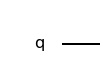

In [3]:
# Problem 1: Implement Mach-Zehnder interferometer in quantum circuit, `mz`

mz = QuantumCircuit(1)

# Insert your code here
#
#
#
#
#

# Visualize the quantum circuit
mz.draw()

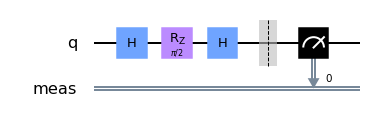

In [4]:
# Solution
mz = QuantumCircuit(1)
mz.h(0)
mz.rz(phi, 0)
mz.h(0)
mz.measure_all()
mz.draw()

### 2.2 Run on QASM Simulator

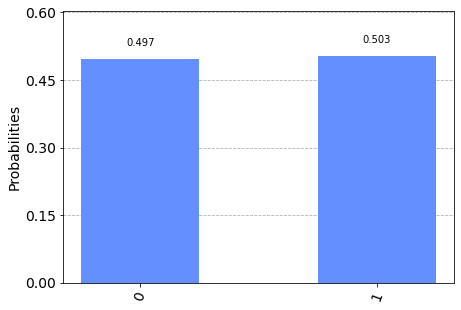

In [5]:
# Verify your circuit is correct
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

result = execute(mz, QasmSimulator(), shots=1024).result()
plot_histogram(result.get_counts())

# If your circuit is correct, you should see 
# approximately 50% 0 and 50% 1 for phi = pi/2
# 100% 0 for phi = 0
# 100% 1 for phi = pi

## 3. Investigate Output Intensity Dependence on Phase Change

The output intensity has strong dependence on phase change. Probability of measuring $|0\rangle$ is $P_{|0\rangle}=\cos ^{2} \frac{\phi_{0}-\phi_{1}}{2}$ and Probability of measuring $|1\rangle$ is $P_{|1\rangle}=\sin ^{2} \frac{\phi_{0}-\phi_{1}}{2}$. Let's do experiments to verify these relations!

In the previous section, you have created a quantum circuit with a specific phase change ($\phi = \phi_{0}-\phi_{1}$). In this section, you will run a series of quantum circuits with different phase change and run them on real devices on IBM Quantum Experience. Plot results as a function of phase change similar to this figure:
<img src="MZI-result-example.pdf" alt="MZI Result Example" width="600"/>

### 3.1 Parameterised Circuits
You can choose to do vary the phase change in a loop but you can also use a handy feature in Qiskit to create parameterised circuit.

In [7]:
from qiskit.circuit import Parameter
phi = Parameter('phi')

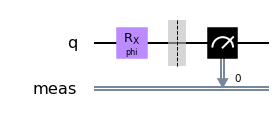

In [8]:
# Create a parameterised circuit

qc = QuantumCircuit(1)
qc.rx(phi, 0)
qc.measure_all()
qc.draw()

# You will see a Rx gate with generic phi as rotation angle

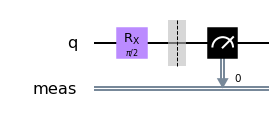

In [9]:
# Assign a value to the parameter

qc.assign_parameters({phi: pi/2}).draw()

# You will see a Rx gate with pi as the rotation angle instead of a generic phi

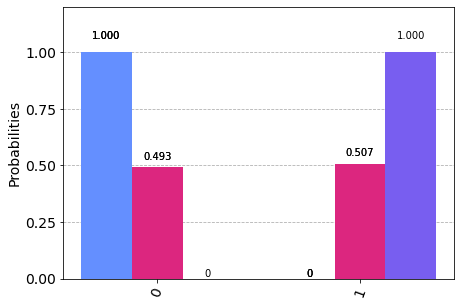

In [10]:
# You can also create a list of parameters to pass to `execute` method
# to execute multiple circuits with different parameter values

parameter_list = [{phi: 0}, {phi:pi/2},{phi:pi}]
job_example = execute(qc, parameter_binds=parameter_list, backend=QasmSimulator(), shots=1024)
plot_histogram(job_example.result().get_counts())

**Note:** You can watch [this 1 Minute Qiskit video](https://youtu.be/adeYx7bwYrA) to learn more about how to create parameterised circuits.

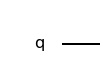

In [11]:
# Problem 2: Implement Mach-Zehnder interferometer in quantum circuit, `mz` with parameter `phi`

mz_para = QuantumCircuit(1)

# Insert your code here
#
#
#
#
#

# Visualize the quantum circuit
mz_para.draw()

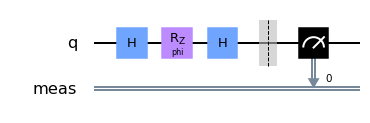

In [12]:
# Solution
mz_para = QuantumCircuit(1)
mz_para.h(0)
mz_para.rz(phi, 0)
mz_para.h(0)
mz_para.measure_all()
mz_para.draw()

### 3.2 Run on IBM Quantum Systems

In [13]:
# Create a parameter list
phi_list = [] # in unit of pi
parameter_list = [{phi:pi*phi} for phi in phi_list]

In [14]:
# Solution
n_max = 50
phase_list = np.linspace(0,4,n_max)
parameter_list = [{phi:pi*phase} for phase in phase_list]

In [15]:
# Load IBM Quantum Experience account
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider

/Users/junye/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
# Find the least busy operational real device
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.status().operational==True 
                                       and not x.configuration().simulator ))
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
# Use a handy job watcher to monitor job status
import qiskit.tools.jupyter
%qiskit_job_watcher

shots=1024
job_exp = execute(mz_para, parameter_binds=parameter_list, backend=backend, shots=shots)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [18]:
# The job may take a few minutes to run. 
# You can note down the `JOB_ID` (shown in the job watcher or on IQX) and retrieve the job later.
# job_exp = backend.retrieve_job('JOD_ID')
job_exp = backend.retrieve_job('5f7eca7620d29900199a41db')

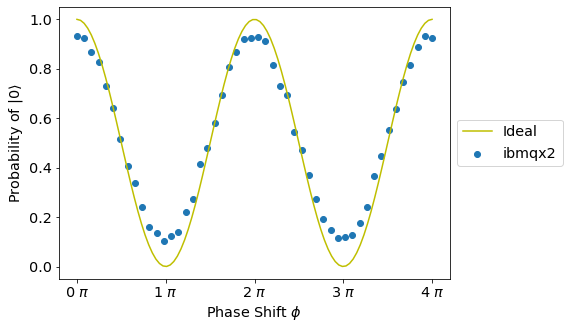

In [20]:
# Create a figure
fig, ax = plt.subplots(figsize=(7, 5))

# Plot experimental results
x = phase_list
visibility = {}
y = [d['0']/shots for d in job_exp.result().get_counts()]
ax.scatter(x,y, label=f"{job_exp.backend().name()}")

# Plot ideal results
ideal_x = np.linspace(0,4,100)
ideal_y = 1/2 * (1 + np.cos(ideal_x * pi))
ax.plot(ideal_x, ideal_y, 'y', label='Ideal')

# Add legend and axes labels
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel(r'Probability of $|0\rangle$')
ax.set_xlabel('Phase Shift $\phi$')

# Add pi in x ticks 
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

In [ ]:
# Save figure to your computer in pdf format
fig.savefig('MZI-result.pdf', bbox_inches="tight")

## 4. Fringe Visibility



We can use fringe visibility as a measure of the quality of interference:

$$V=\frac{I_{\max }-I_{\min }}{I_{\max }+I_{\min }}$$

Let's calculate the fringe visibility for experimental results.

In [ ]:
# Write down the fringe visibility for your experimental results
# You are allowed to use code or calculate by hand
# V = 

$V = 1$ if the intereference is perfect. But as you can see from your calculations, the interference in our experiment is not perfect. List a few possibile reasons for the imperfect interference.

In [22]:
# List a few possible reasons for the imperfect interference
#
#
#
#
#